## Analyzing Customer Churn in a Telecommunications Company
Tasks to Perform:
1. Import the "Telecom_Customer_Churn.csv" dataset.
2. Explore the dataset to understand its structure and content.
3. Handle missing values in the dataset, deciding on an appropriate strategy.
4. Remove any duplicate records from the dataset.
5. Check for inconsistent data, such as inconsistent formatting or spelling variations,and
standardize it.
6. Convert columns to the correct data types as needed.
7. Identify and handle outliers in the data.

In [1]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
# Load the dataset
data = pd.read_csv("telecom_customer_churn.csv")
data.head()

Customer ID  Gender  Age Married  Number of Dependents          City  \
0  0002-ORFBO  Female   37     Yes                     0  Frazier Park   
1  0003-MKNFE    Male   46      No                     0      Glendale   
2  0004-TLHLJ    Male   50      No                     0    Costa Mesa   
3  0011-IGKFF    Male   78     Yes                     0      Martinez   
4  0013-EXCHZ  Female   75     Yes                     0     Camarillo   

   Zip Code   Latitude   Longitude  Number of Referrals  ...   Payment Method  \
0     93225  34.827662 -118.999073                    2  ...      Credit Card   
1     91206  34.162515 -118.203869                    0  ...      Credit Card   
2     92627  33.645672 -117.922613                    0  ...  Bank Withdrawal   
3     94553  38.014457 -122.115432                    1  ...  Bank Withdrawal   
4     93010  34.227846 -119.079903                    3  ...      Credit Card   

  Monthly Charge Total Charges  Total Refunds Total Extra Data Charges  \
0           65.6        593.30           0.00                        0   
1           -4.0        542.40          38.33                       10   
2           73.9        280.85           0.00                        0   
3           98.0       1237.85           0.00                        0   
4           83.9        267.40           0.00                        0   

  Total Long Distance Charges Total Revenue  Customer Status   Churn Category  \
0                      381.51        974.81           Stayed              NaN   
1                       96.21        610.28           Stayed              NaN   
2                      134.60        415.45          Churned       Competitor   
3                      361.66       1599.51          Churned  Dissatisfaction   
4                       22.14        289.54          Churned  Dissatisfaction   

                    Churn Reason  
0                            NaN  
1                            NaN  
2  Competitor had better devices  
3        Product dissatisfaction  
4            Network reliability  

[5 rows x 38 columns]

In [3]:
data.describe()

Age  Number of Dependents      Zip Code     Latitude  \
count  7043.000000           7043.000000   7043.000000  7043.000000   
mean     46.509726              0.468692  93486.070567    36.197455   
std      16.750352              0.962802   1856.767505     2.468929   
min      19.000000              0.000000  90001.000000    32.555828   
25%      32.000000              0.000000  92101.000000    33.990646   
50%      46.000000              0.000000  93518.000000    36.205465   
75%      60.000000              0.000000  95329.000000    38.161321   
max      80.000000              9.000000  96150.000000    41.962127   

         Longitude  Number of Referrals  Tenure in Months  \
count  7043.000000          7043.000000       7043.000000   
mean   -119.756684             1.951867         32.386767   
std       2.154425             3.001199         24.542061   
min    -124.301372             0.000000          1.000000   
25%    -121.788090             0.000000          9.000000   
50%    -119.595293             0.000000         29.000000   
75%    -117.969795             3.000000         55.000000   
max    -114.192901            11.000000         72.000000   

       Avg Monthly Long Distance Charges  Avg Monthly GB Download  \
count                        6361.000000              5517.000000   
mean                           25.420517                26.189958   
std                            14.200374                19.586585   
min                             1.010000                 2.000000   
25%                            13.050000                13.000000   
50%                            25.690000                21.000000   
75%                            37.680000                30.000000   
max                            49.990000                85.000000   

       Monthly Charge  Total Charges  Total Refunds  Total Extra Data Charges  \
count     7043.000000    7043.000000    7043.000000               7043.000000   
mean        63.596131    2280.381264       1.962182                  6.860713   
std         31.204743    2266.220462       7.902614                 25.104978   
min        -10.000000      18.800000       0.000000                  0.000000   
25%         30.400000     400.150000       0.000000                  0.000000   
50%         70.050000    1394.550000       0.000000                  0.000000   
75%         89.750000    3786.600000       0.000000                  0.000000   
max        118.750000    8684.800000      49.790000                150.000000   

       Total Long Distance Charges  Total Revenue  
count                  7043.000000    7043.000000  
mean                    749.099262    3034.379056  
std                     846.660055    2865.204542  
min                       0.000000      21.360000  
25%                      70.545000     605.610000  
50%                     401.440000    2108.640000  
75%                    1191.100000    4801.145000  
max                    3564.720000   11979.340000

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              3166 non-null   objec

In [5]:
data.shape

(7043, 38)

In [6]:
data.nunique()

Customer ID                          7043
Gender                                  2
Age                                    62
Married                                 2
Number of Dependents                   10
City                                 1106
Zip Code                             1626
Latitude                             1626
Longitude                            1625
Number of Referrals                    12
Tenure in Months                       72
Offer                                   5
Phone Service                           2
Avg Monthly Long Distance Charges    3583
Multiple Lines                          2
Internet Service                        2
Internet Type                           3
Avg Monthly GB Download                49
Online Security                         2
Online Backup                           2
Device Protection Plan                  2
Premium Tech Support                    2
Streaming TV                            2
Streaming Movies                  

In [7]:
data.isnull().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                  

In [8]:
# Fill categorical columns with mode or specific labels
data['Offer'].fillna(data['Offer'].mode()[0], inplace=True)
data['Multiple Lines'].fillna(data['Multiple Lines'].mode()[0], inplace=True)
data['Internet Type'].fillna(data['Internet Type'].mode()[0], inplace=True)
data['Unlimited Data'].fillna(data['Unlimited Data'].mode()[0], inplace=True)

data['Online Security'].fillna('nan', inplace=True)
data['Online Backup'].fillna('nan', inplace=True)
data['Device Protection Plan'].fillna('nan', inplace=True)
data['Premium Tech Support'].fillna('nan', inplace=True)
data['Streaming TV'].fillna('nan', inplace=True)
data['Streaming Movies'].fillna('nan', inplace=True)
data['Streaming Music'].fillna('nan', inplace=True)
data['Churn Category'].fillna('nan', inplace=True)
data['Churn Reason'].fillna('nan', inplace=True)

# Fill numeric columns with mean or median
data['Avg Monthly Long Distance Charges'].fillna(data['Avg Monthly Long Distance Charges'].mean(), inplace=True)
data['Avg Monthly GB Download'].fillna(data['Avg Monthly GB Download'].mean(), inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_18184\1611341817.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Offer'].fillna(data['Offer'].mode()[0], inplace=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_18184\1611341817.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

In [9]:
data.isnull().sum()

Customer ID                          0
Gender                               0
Age                                  0
Married                              0
Number of Dependents                 0
City                                 0
Zip Code                             0
Latitude                             0
Longitude                            0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data           

In [10]:
# Remove Duplicate Records
print("Number of rows before removing duplicates:", len(data))
data_cleaned = data.drop_duplicates()
print("Number of rows after removing duplicates:", len(data_cleaned))

Number of rows before removing duplicates: 7043
Number of rows after removing duplicates: 7043


In [11]:
# Measure frequency distribution for 'tenure', 'MonthlyCharges', and 'TotalCharges'
unique_tenure, counts_tenure = np.unique(data['Tenure in Months'], return_counts=True)
print(unique_tenure, counts_tenure)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72] [613 238 200 176 133 110 131 123 119 127  99 117 109  76  99  80  87  97
  73  71  63  90  85  94  79  79  72  57  72  72  65  69  64  65  88  50
  65  59  56  64  70  65  65  51  61  74  68  64  66  68  68  80  70  68
  64  80  65  67  60  76  76  70  72  80  76  89  98 100  95 119 170 362]


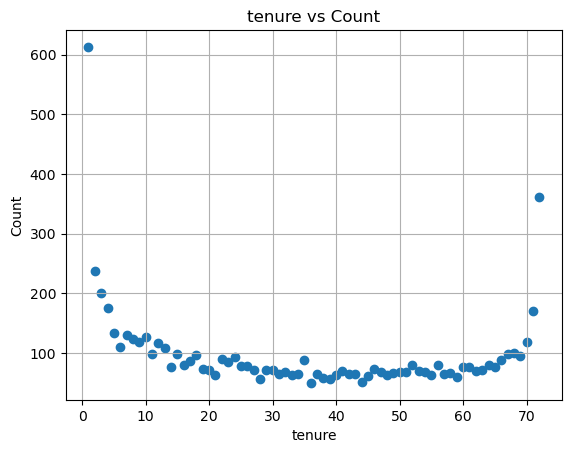

In [21]:
plt.scatter(unique_tenure, counts_tenure)
plt.title('tenure vs Count')
plt.xlabel('tenure')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [12]:
unique_monthly_charges, counts_monthly_charges = np.unique(data['Monthly Charge'], return_counts=True)
print(unique_monthly_charges, counts_monthly_charges)

[-10.    -9.    -8.   ... 118.6  118.65 118.75] [13  9 12 ...  2  1  1]


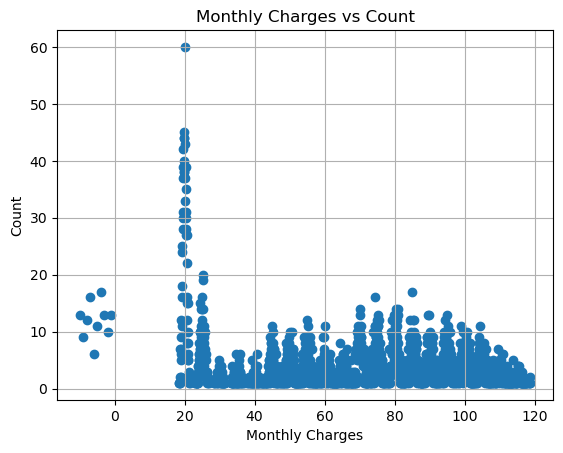

In [22]:
plt.scatter(unique_monthly_charges, counts_monthly_charges)
plt.title('Monthly Charges vs Count')
plt.xlabel('Monthly Charges')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [13]:
unique_total_charges, counts_total_charges = np.unique(data['Total Charges'], return_counts=True)
print(unique_total_charges, counts_total_charges)

[  18.8    18.85   18.9  ... 8670.1  8672.45 8684.8 ] [1 2 1 ... 1 1 1]


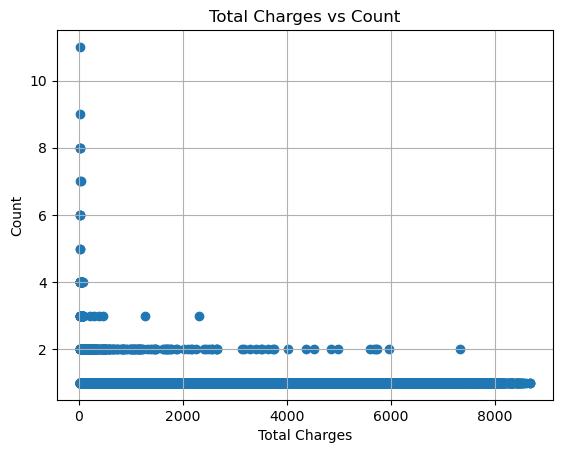

In [24]:
plt.scatter(unique_total_charges, counts_total_charges)
plt.title('Total Charges vs Count')
plt.xlabel('Total Charges')
plt.ylabel('Count')
plt.grid(True)
plt.show()

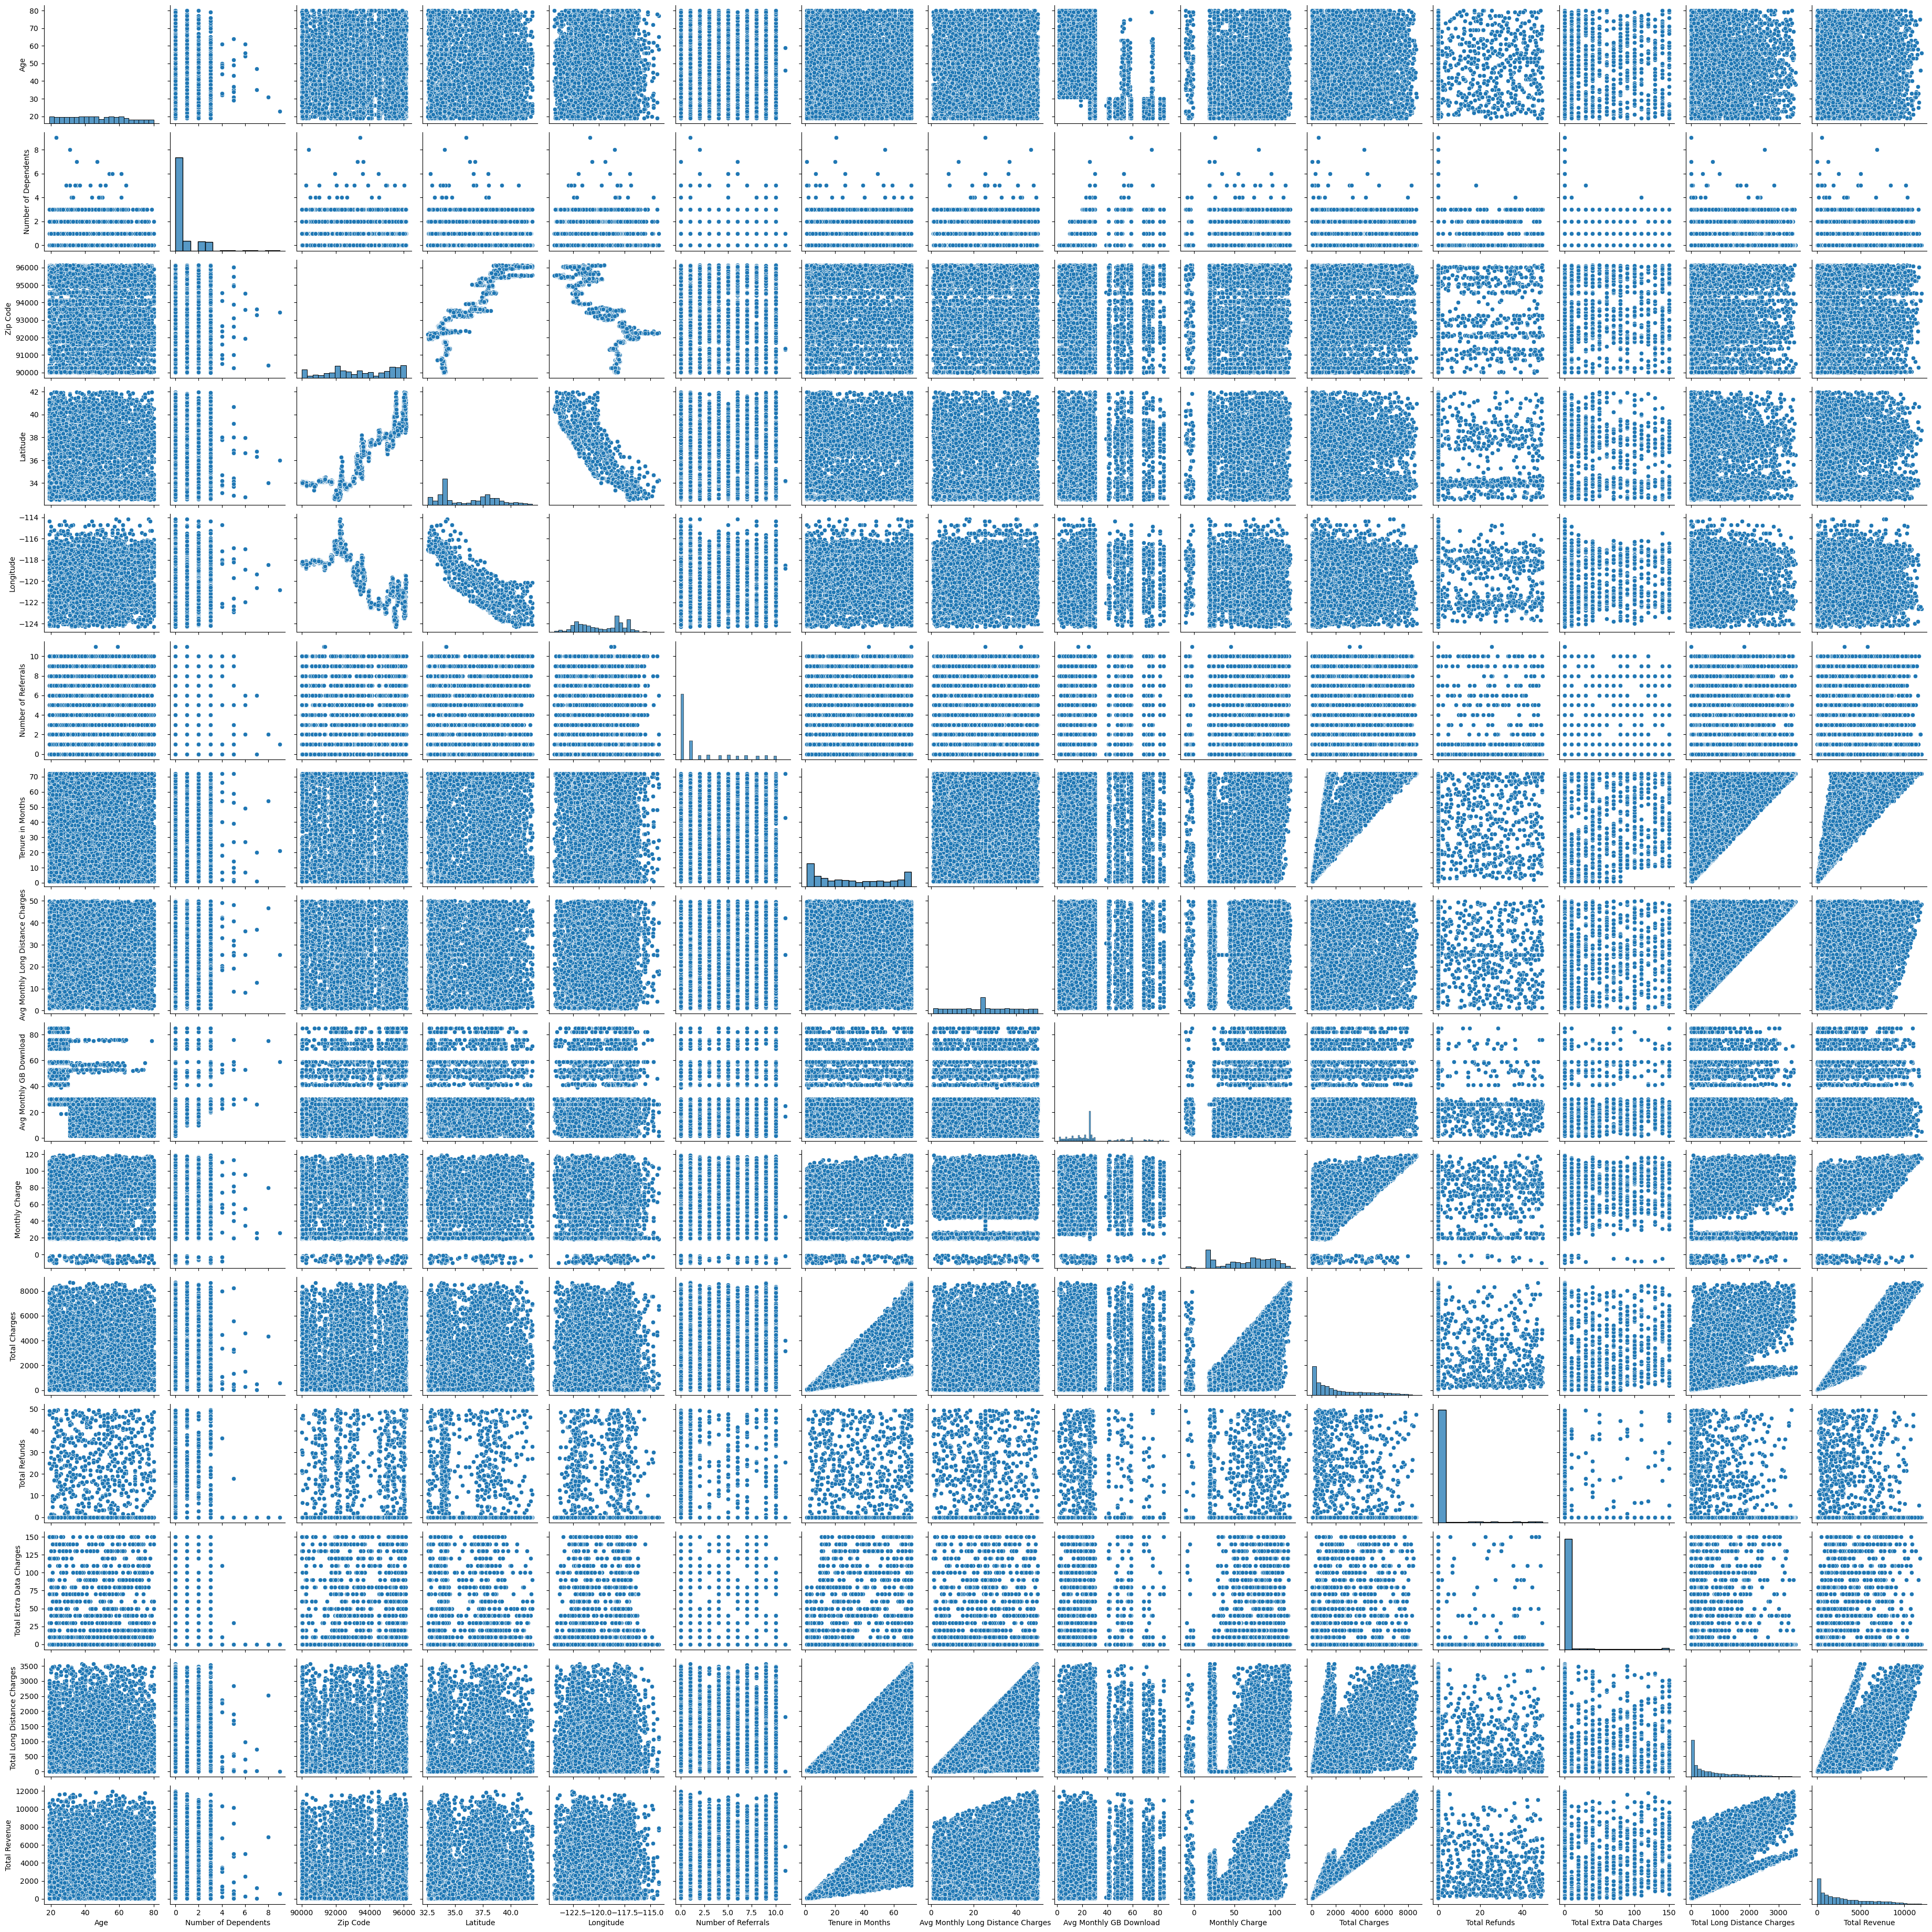

In [14]:
# Visualize pairwise relationships
sns.pairplot(data)
plt.show()

Text(0.5, 1.0, 'Boxplot of Tenure')

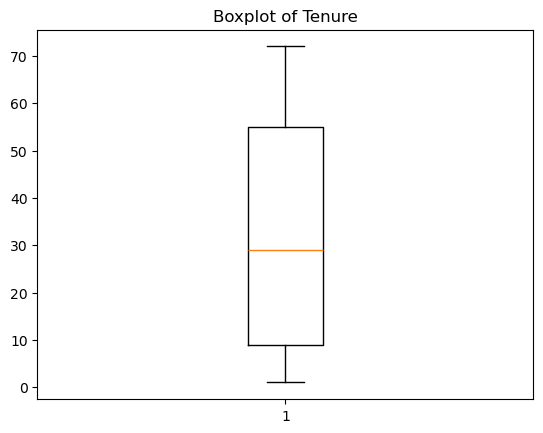

In [15]:
# Check for outliers using boxplots
plt.boxplot(data['Tenure in Months'])
plt.title('Boxplot of Tenure')

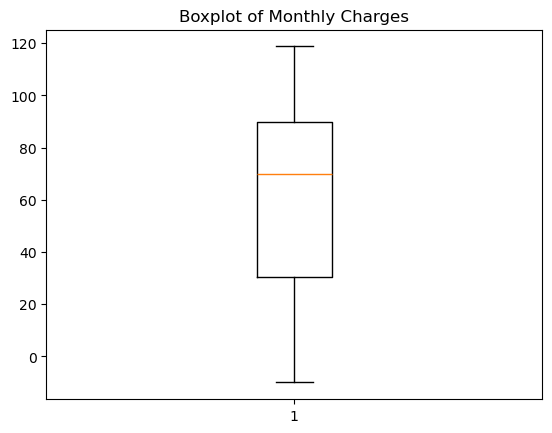

In [16]:
plt.boxplot(data['Monthly Charge'])
plt.title('Boxplot of Monthly Charges')
plt.show()

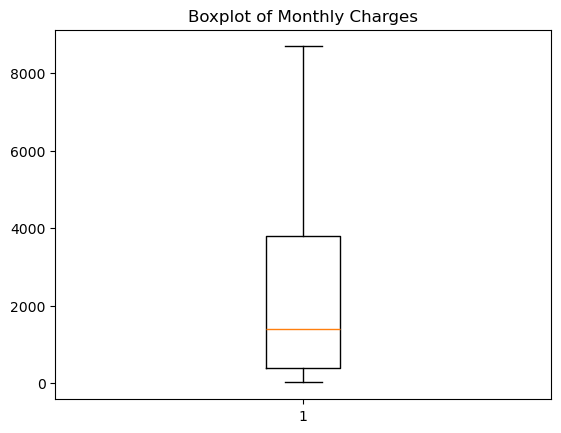

In [17]:
plt.boxplot(data['Total Charges'])
plt.title('Boxplot of Monthly Charges')
plt.show()

In [ ]:
#Remove Outlier If Have
#1)Z-score
from scipy import stats
data = data[(np.abs(stats.zscore(data)) < 3).all(axis=1)]

#2)IQR
Q1 = data['column'].quantile(0.25)
Q3 = data['column'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data = data[(data['column'] >= lower_bound) & (data['column'] <= upper_bound)]

In [20]:
# Split the data into features and target variable
X = data.drop("Churn Category", axis=1)  # Features
y = data["Churn Category"]  # Target variable 

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# Export the cleaned data
data_cleaned.to_csv("Cleaned_Telecom_Customer_Churn.csv", index=False)

(5634, 37) (5634,)
(1409, 37) (1409,)
